In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [54]:
%load_ext autoreload
%autoreload 2

import rbm_qst
import rbm_classic

import utils
import paper_functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Research

## RBM QST

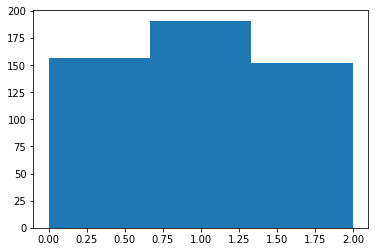

In [55]:
num_units = 3
n_hidd = 3
num_samples = 1000

dataset = utils.dataset_w(num_units, num_samples, hist=True)
r_qst = rbm_qst.RBM_QST(num_units, n_hidd)

# # Replace `r_qst.weights_lambda` with `r_cl.weights`.
# #
# r_cl = rbm_classic.RBM(num_units, 3)  # RBM from rbm_classic.py
# r_cl.train(dataset, max_epochs=150, learning_rate=0.5)
# r_qst.weights_lambda = r_cl.weights



In [72]:
occurs, hist = utils.dataset_to_hist(dataset)

In [71]:
start_time = time.time()
#print(dataset)
r_qst.train(dataset, dataset, max_epochs=200, learning_rate=0.2, overlap_each=200, debug=True, precise=True)
print("--- %s seconds ---" % (time.time() - start_time))

[[1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]]
Epoch 0: objective is 1.12898162452
Epoch 100: objective is 1.12653947747
--- 0.27712297439575195 seconds ---


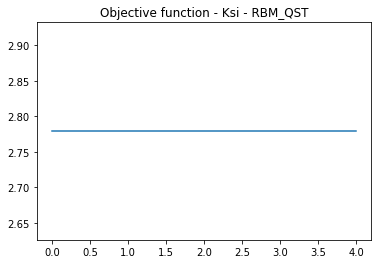

In [65]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [66]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(dataset))
fid

/home/z3468157/Dropbox/QC_Project/qml/nn_qst/rbm_qst.py:96: RuntimeWarning: invalid value encountered in greater
  hidden_states = hidden_probs > np.random.rand(self.num_hidden + 1)
/home/z3468157/Dropbox/QC_Project/qml/nn_qst/rbm_qst.py:103: RuntimeWarning: invalid value encountered in greater
  visible_states = visible_probs > np.random.rand(self.num_visible + 1)


0

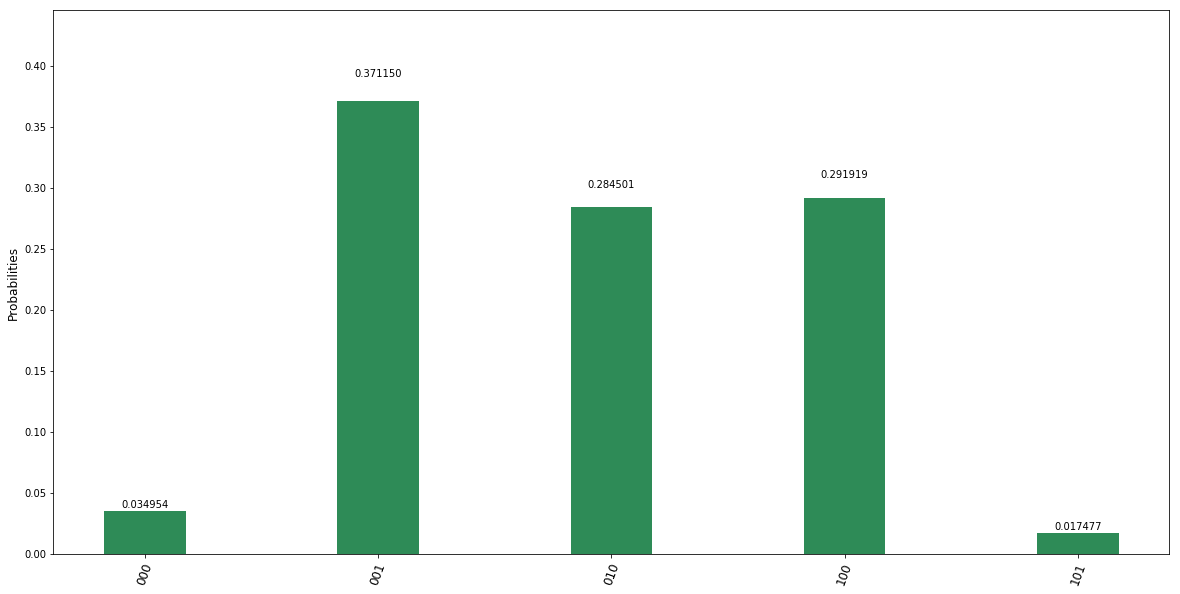

In [80]:
utils.plot_histogram(states)

## Classical RBM

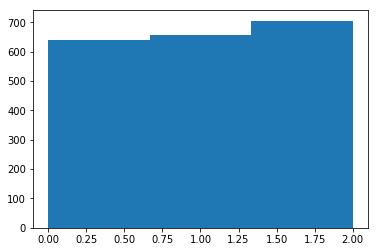

In [81]:
num_units = 3

r_cl = rbm_classic.RBM(num_units, 5)
dataset = utils.dataset_w(num_units, 2000, hist=True)

In [98]:
r_cl.train(dataset, max_epochs=2000, learning_rate=0.1)

Epoch 0: objective is 1.11982714247
Epoch 50: objective is 1.11973508586
Epoch 100: objective is 1.11966175567
Epoch 150: objective is 1.11951577722
Epoch 200: objective is 1.11950176491
Epoch 250: objective is 1.1196003276
Epoch 300: objective is 1.11966762291
Epoch 350: objective is 1.11958112607
Epoch 400: objective is 1.11960789859
Epoch 450: objective is 1.11956676206
Epoch 500: objective is 1.1195668636
Epoch 550: objective is 1.11950075037
Epoch 600: objective is 1.11950407162
Epoch 650: objective is 1.11949172532
Epoch 700: objective is 1.11955884441
Epoch 750: objective is 1.11947615586
Epoch 800: objective is 1.11933800731
Epoch 850: objective is 1.11936287888
Epoch 900: objective is 1.11933079744
Epoch 950: objective is 1.11923861012
Epoch 1000: objective is 1.11924375842
Epoch 1050: objective is 1.11934373776
Epoch 1100: objective is 1.11931104774
Epoch 1150: objective is 1.1192010922
Epoch 1200: objective is 1.11916805964
Epoch 1250: objective is 1.11914172891
Epoch 1300: 

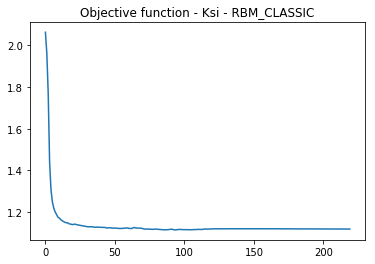

In [99]:
plt.plot(r_cl.objectives)
plt.title('Objective function - Ksi - RBM_CLASSIC')
plt.show()

In [100]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))
fid

0.99496385850443658

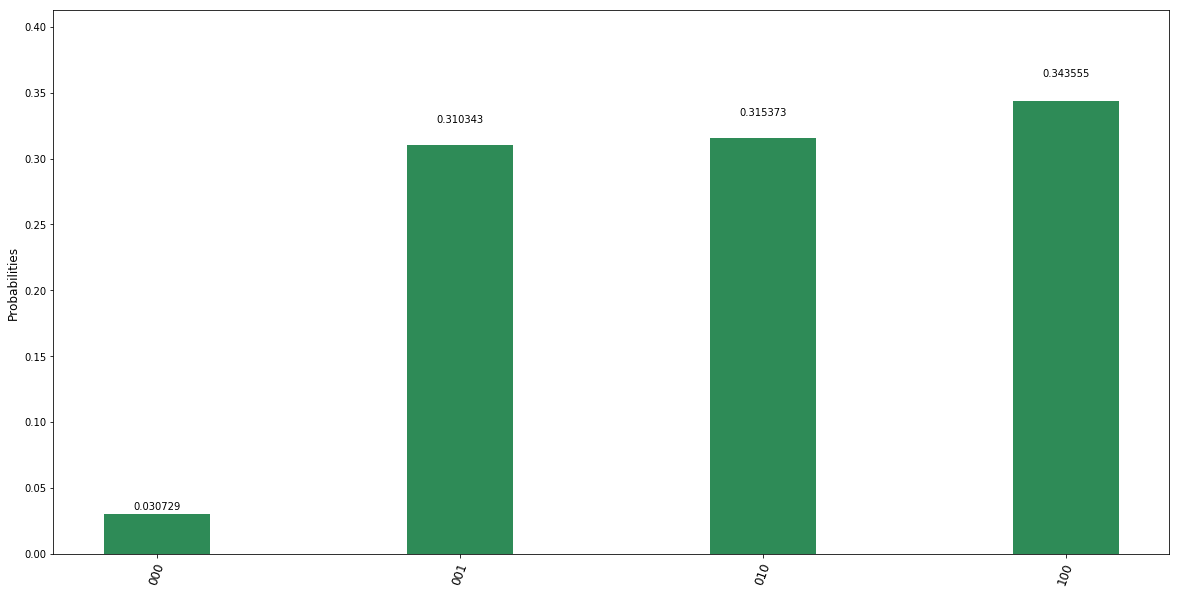

In [101]:
utils.plot_histogram(states)

# Plot Fig.1 b

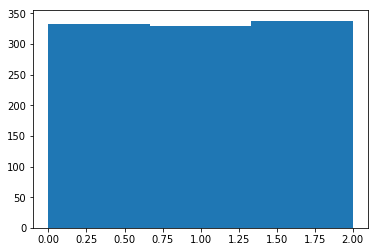

In [102]:
dataset = utils.dataset_w(num_units, 1000, hist=True)

In [19]:
import tqdm

num_units = 3
fidelities = []
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_cl = rbm_classic.RBM(num_units, num_units, debug_print=False)
    r_cl.train(dataset, max_epochs=10000, learning_rate=0.3)

    fidelities.append(utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))[0])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))

100%|██████████| 4/4 [00:08<00:00,  2.27s/it]


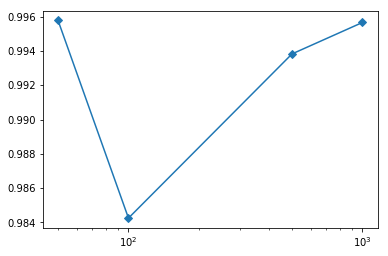

In [20]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.show()